**Install & Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import graphviz

**Load Dataset**

In [2]:
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

**Train-Test Split**

In [3]:
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Decision Tree Classifier**

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize the tree
dot_data = export_graphviz(
    dt, out_file=None, feature_names=X.columns, class_names=["No Disease", "Disease"],
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # Saves tree as PNG

Decision Tree Accuracy: 0.9853658536585366


'decision_tree.png'

**Control Overfitting (Limit Depth)**

In [5]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

y_pred_dt_lim = dt_limited.predict(X_test)
print("Limited Depth Tree Accuracy:", accuracy_score(y_test, y_pred_dt_lim))

Limited Depth Tree Accuracy: 0.8


**Random Forest Classifier**

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


**Feature Importances**

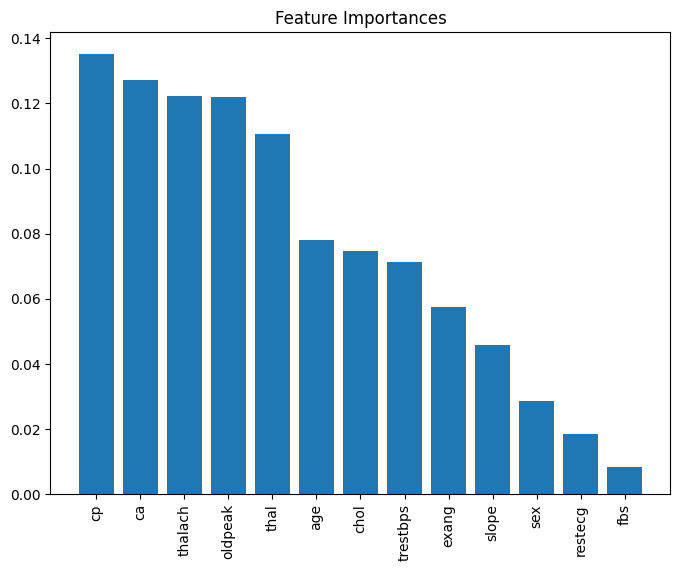

In [7]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

**Cross-Validation**

In [8]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest Cross-Validation Accuracy:", np.mean(cv_scores))

Random Forest Cross-Validation Accuracy: 0.9970731707317073
